In [2]:
%matplotlib inline

In [3]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load/read csv files
city_data_df = pd.read_csv("resources/city_data.csv")
ride_data_df = pd.read_csv("resources/ride_data.csv")

In [5]:
#ride_data_df.head(10)

In [6]:
# get rows/columns that are NOT null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# get data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# get unique values of type of city
city_data_df["type"].unique()

# get # of data points per city type
n_urban = sum(city_data_df["type"] == "Urban")
n_suburb = sum(city_data_df["type"] == "Suburban")
n_rural = sum(city_data_df["type"] == "Rural")
n_rural

18

In [9]:
# get rows/columns that are NOT null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
# get data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
# merge datasets
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# dataframes for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburb_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [27]:
# get # of rides per city
urban_ride_ct = urban_cities_df.groupby(["city"]).count()["driver_count"]
suburb_ride_ct = suburb_cities_df.groupby(["city"]).count()["driver_count"]
rural_ride_ct = rural_cities_df.groupby(["city"]).count()["driver_count"]

urban_ride_ct.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: driver_count, dtype: int64

In [29]:
# get mean fare per city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburb_avg_fare = suburb_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [32]:
# get mean # of driver per city 
urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburb_avg_drivers = suburb_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

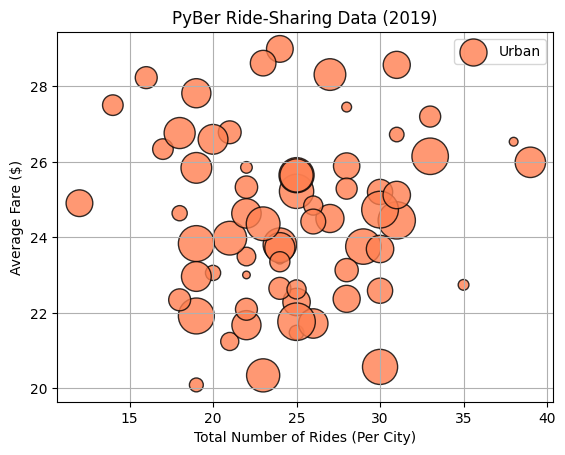

In [47]:
# urban cities bubble chart
plt.scatter(
    urban_ride_ct, urban_avg_fare,
    s=(urban_avg_drivers*10), c="coral",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Urban")

# titles/labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)
plt.legend()

plt.show()

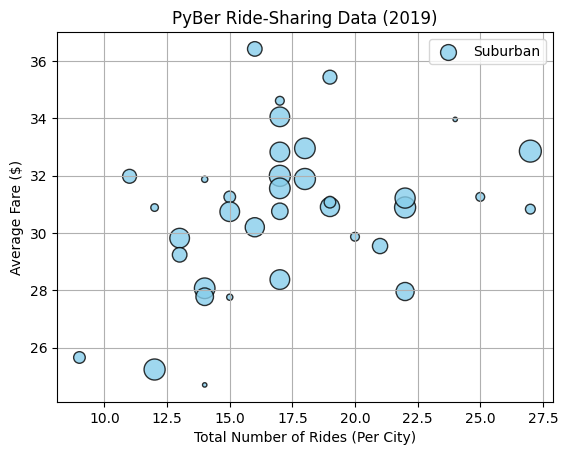

In [48]:
# suburban cities bubble chart
plt.scatter(
    suburb_ride_ct, suburb_avg_fare,
    s=(suburb_avg_drivers*10), c="skyblue",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Suburban")

# titles/labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)
plt.legend()

plt.show()

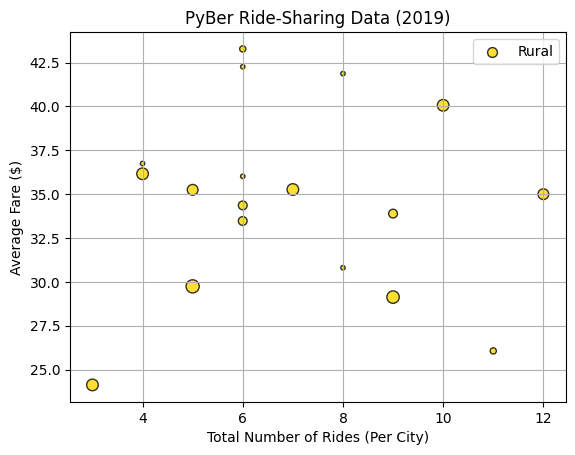

In [49]:
# rural cities bubble chart
plt.scatter(
    rural_ride_ct, rural_avg_fare,
    s=(rural_avg_drivers*10), c="gold",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Rural")

# titles/labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)
plt.legend()

plt.show()

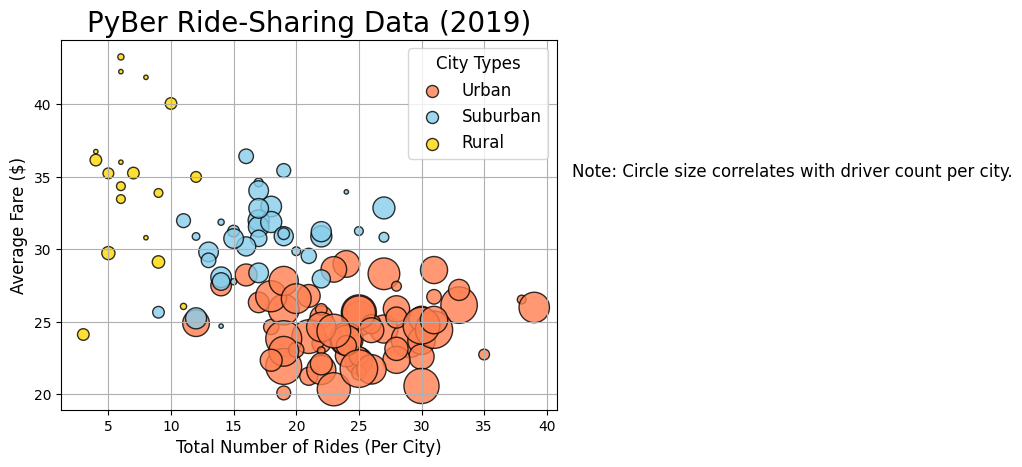

In [61]:
# combined bubble chart

# urban cities bubble chart
plt.scatter(
    urban_ride_ct, urban_avg_fare,
    s=(urban_avg_drivers*10), c="coral",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Urban")

# suburban cities bubble chart
plt.scatter(
    suburb_ride_ct, suburb_avg_fare,
    s=(suburb_avg_drivers*10), c="skyblue",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Suburban")

# rural cities bubble chart
plt.scatter(
    rural_ride_ct, rural_avg_fare,
    s=(rural_avg_drivers*10), c="gold",
    edgecolor="black", linewidth=1,
    alpha=0.8, label="Rural")

# labels/titles
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)

plt.grid(True)

# legend
legend = plt.legend(fontsize="12",
         scatterpoints=1, loc="best", title="City Types")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
legend.get_title().set_fontsize(12)

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

plt.savefig("analysis/fig1.png")

plt.show()